# Inverse Kinematics

if you wangt to use this script, you need Sympy

In [ ]:
import sympy 
from sympy import *
print(sympy.__version__)

In [ ]:
#Matrix test
T_x_y = Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1]])

## Definicion de la matriz de transformaciones homogeneas

In [ ]:
ai_j, bi_j, gi_j, x_i_j, y_i_j, z_i_j = symbols('ai_j, bi_j, gi_j, x_i_j, y_i_j, z_i_j')

T_i_j = Matrix(
    [[cos(ai_j)*cos(bi_j),cos(ai_j)*sin(bi_j)*sin(gi_j)-sin(ai_j)*cos(gi_j),sin(ai_j)*sin(gi_j)+cos(ai_j)*sin(bi_j)*cos(gi_j),x_i_j],
     [sin(ai_j)*cos(bi_j),cos(ai_j)*cos(gi_j)+sin(ai_j)*sin(bi_j)*sin(gi_j),sin(ai_j)*sin(bi_j)*cos(gi_j)-cos(ai_j)*sin(gi_j),y_i_j],
     [-sin(bi_j),cos(bi_j)*sin(gi_j),cos(bi_j)*cos(gi_j),z_i_j],
     [0,0,0,1]])
T_i_j

In [ ]:
T_0_1, z_0_1, theta_0_1 = symbols("T_0_1, z_0_1, theta_0_1")
T_0_1 = Subs(T_i_j,
            (x_i_j, y_i_j, z_i_j, gi_j, bi_j, ai_j),
            (0, 0, z_0_1, 0, 0, theta_0_1))
T_0_1 = T_0_1.simplify()
T_0_1

In [ ]:
T_1_2, z_1_2, theta_1_2 = symbols("T_2_3, z_1_2, theta_1_2")
T_1_2 = Subs(T_i_j,
            (x_i_j, y_i_j, z_i_j, gi_j, bi_j, ai_j),
            (0, 0, z_1_2, 0, theta_1_2, 0))
T_1_2 = T_1_2.simplify()
T_1_2

In [ ]:
T_2_3, z_2_3, theta_2_3 = symbols("T_2_3, z_2_3, theta_2_3")
T_2_3 = Subs(T_i_j,
            (x_i_j, y_i_j, z_i_j, gi_j, bi_j, ai_j),
            (0, 0, z_2_3, 0, theta_2_3, 0))
T_2_3 = T_2_3.simplify()
T_2_3

In [ ]:
T_3_p, L_3_p = symbols("T_3_p, L_3_p")
T_3_p = Subs(T_i_j,
            (x_i_j, y_i_j, z_i_j, gi_j, bi_j, ai_j),
            (0, 0, L_3_p, 0, 0, 0))
T_3_p = T_3_p.simplify()
T_3_p

In [ ]:
T_0_p = symbols("T_0_p")
T_0_p = T_0_1*T_1_2*T_2_3*T_3_p
T_0_p = T_0_p.trigsimp()
T_0_p

In [ ]:
#test
Res = Subs(T_0_p,
            (theta_0_1, theta_1_2, theta_2_3),
            (0, pi/2, pi/2))
Res.simplify()

## Obtencion del vector de pose con solamente posicion

xi_0_p = symbols('xi_0_p')
xi_0_p = Matrix([T_0_p[0,3].trigsimp(),T_0_p[1,3].trigsimp(),T_0_p[2,3].trigsimp()])
xi_0_p

## obtencion del modelo cinematico directo de la postura con solo posicion

${}^{O}\dot{\mathbf{\xi}}_{P} = \mathbf{J}_{\theta}(q) \dot{\mathbf{q}}$


J_theta = symbols("J_theta")
J_theta = xi_0_p.jacobian([theta_0_1, theta_1_2, theta_2_3])
J_theta.simplify()
J_theta

## Obtencion del modelo cinematico inverso de la postura solo con posicion

$\dot{\mathbf{q}} = \mathbf{J}_{\theta}(q)^{+}\,{}^{O}\dot{\mathbf{\xi}}_{P}$

J_theta_inv = J_theta.inv()
J_theta_inv

q_dot = J_theta_inv*Matrix([2,5,3])
q_dot

## Obtencion del vector de pose

In [ ]:
xi_0_p = symbols('xi_0_p')
xi_0_p = Matrix([T_0_p[0,3].trigsimp(),T_0_p[1,3].trigsimp(),T_0_p[2,3].trigsimp(),T_0_p[0,0].trigsimp(),T_0_p[1,1].trigsimp(),T_0_p[2,2].trigsimp()])
xi_0_p

## obtencion del modelo cinematico directo de la postura

${}^{O}\dot{\mathbf{\xi}}_{P} = \mathbf{J}_{\theta}(q) \dot{\mathbf{q}}$


In [ ]:
J_theta = symbols("J_theta")
J_theta = xi_0_p.jacobian([theta_0_1, theta_1_2, theta_2_3])
J_theta.simplify()
J_theta

## Obtencion del modelo cinematico inverso de la postura

### Pseudoinversa

$\dot{\mathbf{q}} = \mathbf{J}_{\theta}(q)^{+}\,{}^{O}\dot{\mathbf{\xi}}_{P}$

dado que no es una matriz cuadrada, procedemos con el calculo de la pseudoinversa

$\mathbf{A}⁺ = (A^tA)^{-1}A^t$

J_theta_tr = J_theta.transpose()
J_theta_tr.simplify()
J_theta_tr

J_thXJ_th_tr = (J_theta_tr*J_theta)
J_thXJ_th_tr.simplify()
J_thXJ_th_tr

J_thXJ_th_tr_simp = Matrix([[J_thXJ_th_tr[0,0],J_thXJ_th_tr[0,1],J_thXJ_th_tr[0,2]],
                            [J_thXJ_th_tr[1,0],J_thXJ_th_tr[1,1].trigsimp(),J_thXJ_th_tr[1,2].trigsimp()],
                            [J_thXJ_th_tr[2,0],J_thXJ_th_tr[2,1].trigsimp(),J_thXJ_th_tr[2,2]]])
J_thXJ_th_tr_simp

J_thXJ_th_tr_inv = J_thXJ_th_tr_simp.inv()
J_thXJ_th_tr_inv

J_theta_inv = J_thXJ_th_tr_inv*J_theta.transpose()

### SVD
segun [este](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse#Using_polynomials_in_matrices) articulo es posible usar SVD (singular value descomposition) para obtener la pseudoinversa, tal que:

$A=U\Sigma V^{*} \to A^{+}=V\Sigma^{+}U^{*}$

U,M,V = J_theta.singular_value_decomposition()

J_theta_inv = V*S

### metodo geometrico

como otra opcion, es posible hacer calculos geometricos para obtener las ecuaciones de la cinematica, tomando en cuenta que el sistema se puede separar en 2 partes:

Esta parte se puede analizar como un plano

![Robot_up](./Images/Robot_Up.jpeg)


Esta parte se puede analizar solamente con las componentes XY del punto P

![Robot_down](./Images/Robot_Down.jpeg)


Comenzamos con la parte inferior, tomando el angulo entre ambos elementos como ${}^{0}\theta_1$

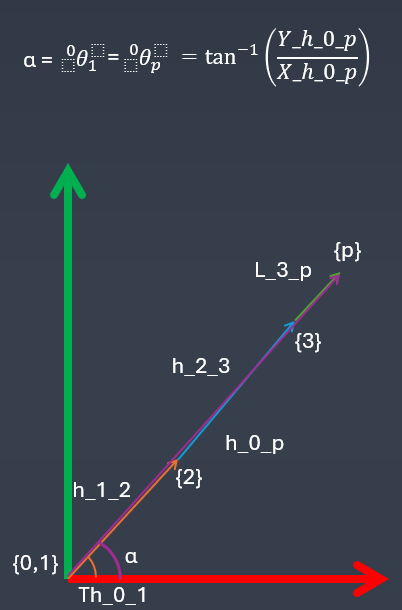

por ende tenenmos que ${}^{0}\theta_1=\arctan(\frac{Y_{h0p}}{X_{h0p}})$

AHora procedemos con la obtencion de ${}^{1}\theta_2$ y ${}^{2}\theta_p$

Para esto, comenzamos por realizar un diagrama planar de los angulos a obtener:

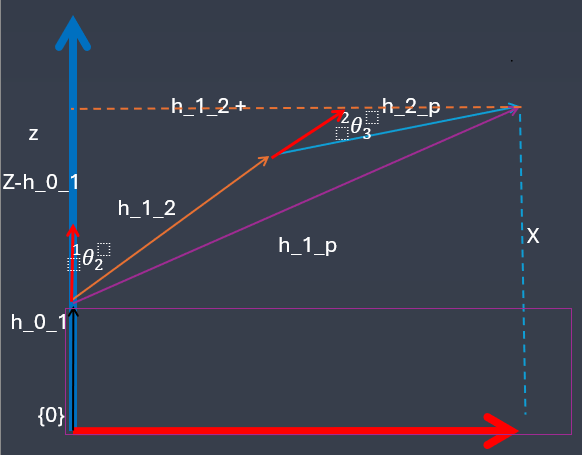

Hay diversas formas de analizar este problema, para esto, me baso en el analisis realizado en el libro "Introduction to robotics" por John J. Craig.

Primero, comenzamos viendo el robot como un triangulo con lados $h_{12}$, $h_{2p}$ y resultante $h_{1p}$

Con esto en mente, podemos usar ley de cosenos para obtener el angulo interno entre cada cateto

$a^{2}=b^{2}+c^{2}-2bc*\cos({\alpha})$

donde 
 - $a^{2}=x^{2}_p + {(z-h_{01})}^{2}$
 - $b=h_{12}$
 - $c=h_{2p}$
 - $\alpha=180-{}^{2}\theta_3$

quedando: 

${x^{2}_p + (z-h_{01})^{2}}={h_{12}}^{2}+{h_{2p}}^{2}-2h_{12}h_{2p}*\cos({180-{}^{2}\theta_3})$

como $\cos(\pi-\theta)=-\cos(\theta)$

entonces:

${x^{2}_p + (z-h_{01})^{2}}={h_{12}}^{2}+{h_{2p}}^{2}+2h_{12}h_{2p}*\cos({{}^{2}\theta_3})$

finalmente despejamos ${}^{2}\theta_3$

${}^{2}\theta_3 = \arccos(\frac{{x^{2}_p + (z-h_{01})^{2}}-h_{12}^{2}-{h_{2p}}^{2}}{2h_{12}h_{2p}})$